In [100]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader


In [101]:
csv_path = "near_miss_data.csv"

df = pd.read_csv(csv_path)
print(df.shape)
print(df.columns)


(1120, 59)
Index(['ID', 'RESIDENTIAL', 'BUSINESS', 'RURAL', 'ONE_WAY', 'BOTH_WAY',
       'SIDE_1', 'SIDE_2', 'SIDE_3', 'SIDE_4', 'INTERSECTION3',
       'INTERSECTION4', 'LANE_1', 'LANE_2', 'LANE_3', 'CROSS_NO', 'CROSS_YES',
       'STOPCAR_ZERO', 'STOPCAR_LOW', 'STOPCAR_MID', 'STOPCAR_HIGH',
       'PEDESTRIAN_LOW', 'PEDESTRIAN_MID', 'PEDESTRIAN_HIGH', 'TRAFFIC_LOW',
       'TRAFFIC_MID', 'TRAFFIC_HIGH', 'LEAD_NO', 'LEAD_YES', 'SUNNY', 'RAIN',
       'TIME6_10', 'TIME10_16', 'TIME16_20', 'TIME20_6', 'AGE_UNKOWN',
       'AGE_OLDER', 'AGE_MATURE', 'AGE_YOUNG', 'AGE_CHILD', 'SIGNAL_NO',
       'SIGNAL_YES', 'Y_SIGNAL_NO', 'Y_SIGNAL_YES', 'YGAP', 'VLIM',
       'BRIGHTNESS', 'SCT', 'TTC', 'VCAR', 'V4', 'AX7', 'DBLIND', 'DOBJ',
       'PET', 'V_OBJ', 'YEAR', 'MONTH', 'TIME'],
      dtype='object')


In [102]:
# This is the data analysis of near miss data
# An attempt to predict the SCT metric based on the other relevant and fair features were made based on two models:
# Random Forest and Neural Network
# features that are included in the calculation of SCT or highly related to SCT are excluded from the feature set (forbidden_cols)


In [103]:

target = "SCT"

forbidden_cols = [
    "ID", "SCT", "TTC", "PET",
    "V4", "AX7", "V_OBJ"
]
numerical_cols = [
        'YGAP', 'VLIM',
       'BRIGHTNESS', 'VCAR', 'DBLIND', 'DOBJ',
       'YEAR', 'MONTH', 'TIME'
]
categorical_cols = [
    'RESIDENTIAL', 'BUSINESS', 'RURAL', 'ONE_WAY', 'BOTH_WAY',
       'SIDE_1', 'SIDE_2', 'SIDE_3', 'SIDE_4', 'INTERSECTION3',
       'INTERSECTION4', 'LANE_1', 'LANE_2', 'LANE_3', 'CROSS_NO', 'CROSS_YES',
       'STOPCAR_ZERO', 'STOPCAR_LOW', 'STOPCAR_MID', 'STOPCAR_HIGH',
       'PEDESTRIAN_LOW', 'PEDESTRIAN_MID', 'PEDESTRIAN_HIGH', 'TRAFFIC_LOW',
       'TRAFFIC_MID', 'TRAFFIC_HIGH', 'LEAD_NO', 'LEAD_YES', 'SUNNY', 'RAIN',
       'TIME6_10', 'TIME10_16', 'TIME16_20', 'TIME20_6', 'AGE_UNKOWN',
       'AGE_OLDER', 'AGE_MATURE', 'AGE_YOUNG', 'AGE_CHILD', 'SIGNAL_NO',
       'SIGNAL_YES', 'Y_SIGNAL_NO', 'Y_SIGNAL_YES'
]

In [ ]:
# change the forbidden_cols part to num or categorical for other results (remove not)
# all features
feature_cols = [c for c in df.columns if c not in forbidden_cols]
print("Number of features:", len(feature_cols))
feature_cols

Number of features: 43


['RESIDENTIAL',
 'BUSINESS',
 'RURAL',
 'ONE_WAY',
 'BOTH_WAY',
 'SIDE_1',
 'SIDE_2',
 'SIDE_3',
 'SIDE_4',
 'INTERSECTION3',
 'INTERSECTION4',
 'LANE_1',
 'LANE_2',
 'LANE_3',
 'CROSS_NO',
 'CROSS_YES',
 'STOPCAR_ZERO',
 'STOPCAR_LOW',
 'STOPCAR_MID',
 'STOPCAR_HIGH',
 'PEDESTRIAN_LOW',
 'PEDESTRIAN_MID',
 'PEDESTRIAN_HIGH',
 'TRAFFIC_LOW',
 'TRAFFIC_MID',
 'TRAFFIC_HIGH',
 'LEAD_NO',
 'LEAD_YES',
 'SUNNY',
 'RAIN',
 'TIME6_10',
 'TIME10_16',
 'TIME16_20',
 'TIME20_6',
 'AGE_UNKOWN',
 'AGE_OLDER',
 'AGE_MATURE',
 'AGE_YOUNG',
 'AGE_CHILD',
 'SIGNAL_NO',
 'SIGNAL_YES',
 'Y_SIGNAL_NO',
 'Y_SIGNAL_YES']

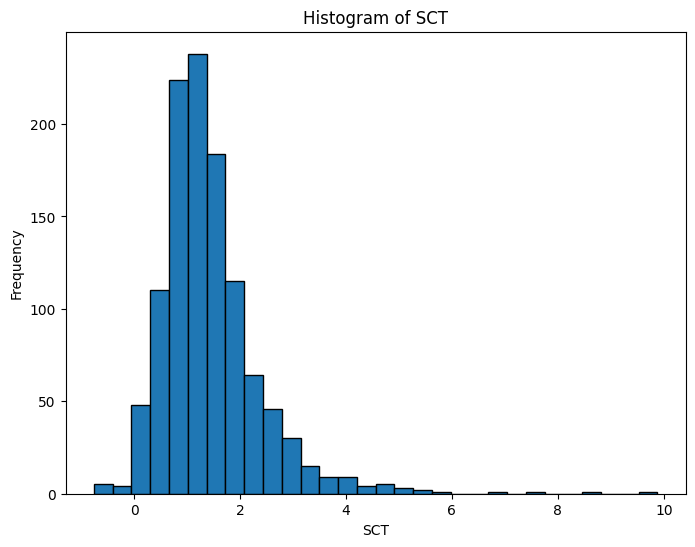

In [105]:
#sct histogram
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df['SCT'], bins=30, edgecolor='black')
plt.title('Histogram of SCT')
plt.xlabel('SCT')
plt.ylabel('Frequency')
plt.show()

In [106]:
X = df[feature_cols]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [107]:
rf_pipeline = Pipeline([
    ("rf", RandomForestRegressor(
        n_estimators=300,
        max_depth=None,
        random_state=42,
        n_jobs=-1
    ))
])

rf_pipeline.fit(X_train, y_train)

y_pred_rf = rf_pipeline.predict(X_test)
y_pred_rf_train = rf_pipeline.predict(X_train)

rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

rmse_rf_train = mean_squared_error(y_train, y_pred_rf_train, squared=False)
r2_rf_train = r2_score(y_train, y_pred_rf_train)

print(f"Random Forest Train RMSE: {rmse_rf_train:.3f}")
print(f"Random Forest Train R²:   {r2_rf_train:.3f}")
print(f"Random Forest Test RMSE: {rmse_rf:.3f}")
print(f"Random Forest Test R²:   {r2_rf:.3f}")


Random Forest Train RMSE: 0.445
Random Forest Train R²:   0.791
Random Forest Test RMSE: 0.956
Random Forest Test R²:   -0.129


/home/eric/anaconda3/envs/altenv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eric/anaconda3/envs/altenv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [108]:
from sklearn.linear_model import LinearRegression

lr_pipeline = Pipeline([
    ("scaler", StandardScaler()),  # for consistency
    ("lr", LinearRegression())
])

lr_pipeline.fit(X_train, y_train)

y_pred_lr = lr_pipeline.predict(X_test)
y_pred_lr_train = lr_pipeline.predict(X_train)

rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
r2_lr = r2_score(y_test, y_pred_lr)

rmse_lr_train = mean_squared_error(y_train, y_pred_lr_train, squared=False)
r2_lr_train = r2_score(y_train, y_pred_lr_train)

print(f"Linear Regression Train RMSE: {rmse_lr_train:.3f}")
print(f"Linear Regression Train R²:   {r2_lr_train:.3f}")
print(f"Linear Regression Test RMSE: {rmse_lr:.3f}")
print(f"Linear Regression Test R²:   {r2_lr:.3f}")

Linear Regression Train RMSE: 0.929
Linear Regression Train R²:   0.089
Linear Regression Test RMSE: 0.887
Linear Regression Test R²:   0.027


/home/eric/anaconda3/envs/altenv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eric/anaconda3/envs/altenv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [109]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

X_train_t = torch.tensor(X_train_s, dtype=torch.float32)
y_train_t = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

X_test_t = torch.tensor(X_test_s, dtype=torch.float32)
y_test_t = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)


In [110]:
from dataset import SCTDataset


train_ds = SCTDataset(X_train_t, y_train_t)
train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)

In [111]:
from neuralnet import SCTNet

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = SCTNet(X_train_t.shape[1]).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)
criterion = nn.MSELoss()


In [112]:
for epoch in range(1000):
    model.train()
    total_loss = 0

    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)

        optimizer.zero_grad()
        pred = model(xb)
        loss = criterion(pred, yb)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * len(xb)

    if epoch % 10 == 0:
        print(f"Epoch {epoch:02d} | Train MSE: {total_loss / len(train_ds):.4f}")


Epoch 00 | Train MSE: 2.1416
Epoch 10 | Train MSE: 0.8248
Epoch 10 | Train MSE: 0.8248
Epoch 20 | Train MSE: 0.7597
Epoch 20 | Train MSE: 0.7597
Epoch 30 | Train MSE: 0.6828
Epoch 30 | Train MSE: 0.6828
Epoch 40 | Train MSE: 0.6801
Epoch 40 | Train MSE: 0.6801
Epoch 50 | Train MSE: 0.6027
Epoch 50 | Train MSE: 0.6027
Epoch 60 | Train MSE: 0.5639
Epoch 60 | Train MSE: 0.5639
Epoch 70 | Train MSE: 0.5129
Epoch 70 | Train MSE: 0.5129
Epoch 80 | Train MSE: 0.4745
Epoch 80 | Train MSE: 0.4745
Epoch 90 | Train MSE: 0.4219
Epoch 100 | Train MSE: 0.3783
Epoch 90 | Train MSE: 0.4219
Epoch 100 | Train MSE: 0.3783
Epoch 110 | Train MSE: 0.3910
Epoch 110 | Train MSE: 0.3910
Epoch 120 | Train MSE: 0.3725
Epoch 130 | Train MSE: 0.3698
Epoch 120 | Train MSE: 0.3725
Epoch 130 | Train MSE: 0.3698
Epoch 140 | Train MSE: 0.3461
Epoch 150 | Train MSE: 0.3422
Epoch 140 | Train MSE: 0.3461
Epoch 150 | Train MSE: 0.3422
Epoch 160 | Train MSE: 0.3258
Epoch 160 | Train MSE: 0.3258
Epoch 170 | Train MSE: 0.3379

In [113]:
model.eval()
with torch.no_grad():
    y_pred_nn = model(X_test_t.to(device)).cpu().numpy().ravel()

rmse_nn = mean_squared_error(y_test, y_pred_nn, squared=False)
r2_nn = r2_score(y_test, y_pred_nn)

print(f"Neural Network RMSE: {rmse_nn:.3f}")
print(f"Neural Network R²:   {r2_nn:.3f}")


Neural Network RMSE: 0.947
Neural Network R²:   -0.107


/home/eric/anaconda3/envs/altenv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [114]:
from sklearn.ensemble import GradientBoostingRegressor

gb_pipeline = Pipeline([
    ("gb", GradientBoostingRegressor(
        n_estimators=300,
        max_depth=5,
        random_state=42
    ))
])

gb_pipeline.fit(X_train, y_train)

y_pred_gb = gb_pipeline.predict(X_test)
y_pred_gb_train = gb_pipeline.predict(X_train)

rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)
r2_gb = r2_score(y_test, y_pred_gb)

rmse_gb_train = mean_squared_error(y_train, y_pred_gb_train, squared=False)
r2_gb_train = r2_score(y_train, y_pred_gb_train)

print(f"Gradient Boosting Train RMSE: {rmse_gb_train:.3f}")
print(f"Gradient Boosting Train R²:   {r2_gb_train:.3f}")
print(f"Gradient Boosting Test RMSE: {rmse_gb:.3f}")
print(f"Gradient Boosting Test R²:   {r2_gb:.3f}")

Gradient Boosting Train RMSE: 0.416
Gradient Boosting Train R²:   0.817
Gradient Boosting Test RMSE: 1.054
Gradient Boosting Test R²:   -0.374


/home/eric/anaconda3/envs/altenv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eric/anaconda3/envs/altenv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


/home/eric/anaconda3/envs/altenv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eric/anaconda3/envs/altenv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eric/anaconda3/envs/altenv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eric/anaconda3/envs/altenv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 an

Average Performance over 100 Seeds:
Random Forest:
  Train RMSE: 0.454, Train R²: 0.774
  Test RMSE: 1.025, Test R²: -0.153

Linear Regression:
  Train RMSE: 0.914, Train R²: 0.087
  Test RMSE: 560993603998.749, Test R²: -1620583414849441280032768.000

Gradient Boosting:
  Train RMSE: 0.446, Train R²: 0.783
  Test RMSE: 1.127, Test R²: -0.414

Neural Network:
  Train RMSE: 0.452, Train R²: 0.777
  Test RMSE: 1.039, Test R²: -0.191



/home/eric/anaconda3/envs/altenv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eric/anaconda3/envs/altenv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


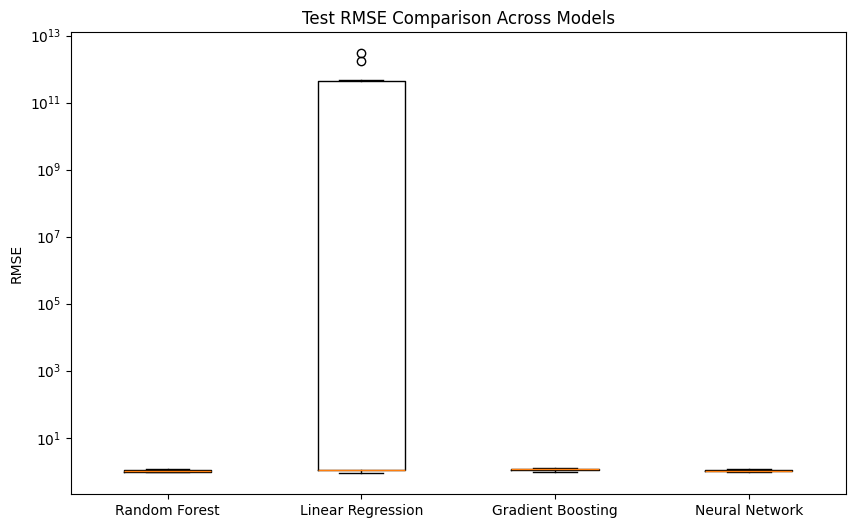

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
import torch


# Define models
models = {
    'Random Forest': Pipeline([("rf", RandomForestRegressor(n_estimators=300, max_depth=None, random_state=42, n_jobs=-1))]),
    'Linear Regression': Pipeline([("scaler", StandardScaler()), ("lr", LinearRegression())]),
    'Gradient Boosting': Pipeline([("gb", GradientBoostingRegressor(n_estimators=300, max_depth=5, random_state=42))]),
    'Neural Network': None  # Special handling
}
# Metrics storage
results = {model: {'train_rmse': [], 'train_r2': [], 'test_rmse': [], 'test_r2': []} for model in models}

num_seeds = 10

for seed in range(num_seeds):
    # Define models
    models = {
        'Random Forest': Pipeline([("rf", RandomForestRegressor(n_estimators=300, max_depth=None, random_state=seed, n_jobs=-1))]),
        'Linear Regression': Pipeline([("scaler", StandardScaler()), ("lr", LinearRegression())]),
        'Gradient Boosting': Pipeline([("gb", GradientBoostingRegressor(n_estimators=300, max_depth=5, random_state=seed))]),
        'Neural Network': None  # Special handling
    }
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

    for model_name, pipeline in models.items():
        if model_name == 'Neural Network':
            # NN setup
            scaler = StandardScaler()
            X_train_s = scaler.fit_transform(X_train)
            X_test_s = scaler.transform(X_test)
            X_train_t = torch.tensor(X_train_s, dtype=torch.float32)
            y_train_t = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
            X_test_t = torch.tensor(X_test_s, dtype=torch.float32)
            y_test_t = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

            train_ds = SCTDataset(X_train_t, y_train_t)
            train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)

            model = SCTNet(X_train_t.shape[1]).to(device)
            optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)
            criterion = nn.MSELoss()

            # Train for fewer epochs to speed up
            for epoch in range(200):  # Reduced from 1000
                model.train()
                total_loss = 0
                for xb, yb in train_loader:
                    xb, yb = xb.to(device), yb.to(device)
                    optimizer.zero_grad()
                    pred = model(xb)
                    loss = criterion(pred, yb)
                    loss.backward()
                    optimizer.step()
                    total_loss += loss.item() * len(xb)

            # Evaluate
            model.eval()
            with torch.no_grad():
                y_pred_train = model(X_train_t.to(device)).cpu().numpy().ravel()
                y_pred_test = model(X_test_t.to(device)).cpu().numpy().ravel()

            rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
            r2_train = r2_score(y_train, y_pred_train)
            rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
            r2_test = r2_score(y_test, y_pred_test)
        else:
            pipeline.fit(X_train, y_train)
            y_pred_train = pipeline.predict(X_train)
            y_pred_test = pipeline.predict(X_test)

            rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
            r2_train = r2_score(y_train, y_pred_train)
            rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
            r2_test = r2_score(y_test, y_pred_test)

        results[model_name]['train_rmse'].append(rmse_train)
        results[model_name]['train_r2'].append(r2_train)
        results[model_name]['test_rmse'].append(rmse_test)
        results[model_name]['test_r2'].append(r2_test)

# Compute averages
print("Average Performance over 100 Seeds:")
for model_name in results:
    avg_train_rmse = np.mean(results[model_name]['train_rmse'])
    avg_train_r2 = np.mean(results[model_name]['train_r2'])
    avg_test_rmse = np.mean(results[model_name]['test_rmse'])
    avg_test_r2 = np.mean(results[model_name]['test_r2'])
    print(f"{model_name}:")
    print(f"  Train RMSE: {avg_train_rmse:.3f}, Train R²: {avg_train_r2:.3f}")
    print(f"  Test RMSE: {avg_test_rmse:.3f}, Test R²: {avg_test_r2:.3f}")
    print()

# Boxplot for test RMSE
plt.figure(figsize=(10, 6))
test_rmse_data = [results[model]['test_rmse'] for model in results]
plt.boxplot(test_rmse_data, labels=results.keys())
plt.title('Test RMSE Comparison Across Models')
plt.ylabel('RMSE')
plt.yscale('log')
plt.show()